In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Method 1 - scatterplot

scatterplot can accept two variables to its distribution, but we only need 'Fare' hued by 'Survived'


so I add an useless column and set them to 1

In [43]:
df['useless'] = 1

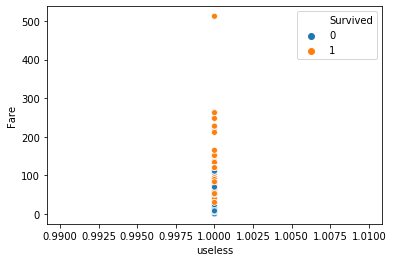

In [44]:
ax = sns.scatterplot(x = 'useless', y="Fare",
                     hue="Survived", data=df)

In the diagram above, yellow spots are the people who survived while the blue ones are not.

We can easily found that high fare spots are mostly yellow, so it means that people who pay a lot are more likely to survived

# Method 2 - Survival Rate

Create a new column to divide passengers into several classes based on fare

In [51]:
df['Fare_class'] = df['Fare'].apply(lambda x: int(x/25))
df['Fare_class']

0      0
1      2
2      0
3      2
4      0
      ..
882    0
883    1
884    0
885    1
886    0
Name: Fare_class, Length: 887, dtype: int64

Fortunately, the values in column Survived are eigher 0 or 1,

which means that we can get survival rate by their mean value

In [52]:
df2 = df.groupby(x).mean()
df2

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,use_less,useless
Fare_class,,,,,,,,
0,0.289331,2.768535,27.517034,0.247740,0.184448,10.672558,1.0,1.0
1,0.421965,1.838150,30.944104,1.017341,0.861272,31.066306,1.0,1.0
2,0.546875,1.546875,33.437500,1.437500,0.468750,59.939323,1.0,1.0
3,0.795455,1.000000,37.977273,0.590909,0.272727,82.492141,1.0,1.0
4,0.733333,1.000000,31.400000,0.733333,0.933333,112.933880,1.0,1.0
5,0.888889,1.000000,41.333333,0.555556,0.111111,137.360167,1.0,1.0
6,0.666667,1.000000,29.102222,0.444444,1.222222,155.146767,1.0,1.0
8,0.600000,1.000000,32.600000,0.000000,0.800000,213.458340,1.0,1.0
9,0.666667,1.000000,36.166667,0.166667,0.333333,234.190267,1.0,1.0


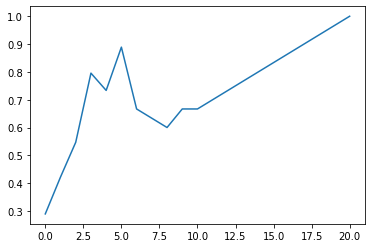

In [58]:
sns.lineplot(data = df2['Survived'])

In the diagram above, we can easily see that the survival rate has positive correlation with fare